## Importanto Bibliotecas

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
%matplotlib inline
data_is_formated = True

Carregando Dados

In [2]:
df_data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df_data.replace(to_replace='Sky is Clear', value='sky is clear', inplace=True)

# Análise da Base

## Verificando Valores Nulos

In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
holiday                48204 non-null object
temp                   48204 non-null float64
rain_1h                48204 non-null float64
snow_1h                48204 non-null float64
clouds_all             48204 non-null int64
weather_main           48204 non-null object
weather_description    48204 non-null object
date_time              48204 non-null object
traffic_volume         48204 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Conforme Visto, a base apresenta 9 colunas, e 48204 instâncias, das quais nenhum das colunas apresentam valores nulos

## Verificando Instâncias duplicadas

In [4]:
df_data[df_data.duplicated(keep=False)].head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
18696,None,286.290,0.0,0.0,1,Clear,sky is clear,2015-09-30 19:00:00,3679
18697,None,286.290,0.0,0.0,1,Clear,sky is clear,2015-09-30 19:00:00,3679
23850,None,289.060,0.0,0.0,90,Clouds,overcast clouds,2016-06-01 10:00:00,4831
23851,None,289.060,0.0,0.0,90,Clouds,overcast clouds,2016-06-01 10:00:00,4831
26783,None,289.775,0.0,0.0,56,Clouds,broken clouds,2016-09-21 15:00:00,5365


A base apresenta algumas linhas duplicadas, acima vemos apenas algumas delas, para resolver, iremos deletar as primeiras linhas duplicadas

In [5]:
df_data.drop_duplicates(keep='last', inplace=True)
df_data[df_data.duplicated()]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume


Vemos Assima que não há mais nenhuma linha duplicada

## Coluna Holiday Contém apenas None ?

Aparentemente, a coluna Holiday apresenta valores iguais para todas as Intâncias, para confirmar :

In [6]:
df_data.groupby('holiday').count().head(3)

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
holiday,,,,,,,,
Christmas Day,6,6,6,6,6,6,6,6
Columbus Day,5,5,5,5,5,5,5,5
Independence Day,5,5,5,5,5,5,5,5


Conforme visto era uma suspeita Falsa

## Procurando E Removendo Outliers

## Coluna Temperatura

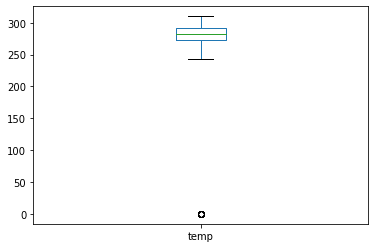

In [7]:
df_data['temp'].plot.box()

Conforme Visto, Parece ter uma temperatura próximo de 0, ao que tudo indica a temperatura está em Kelvin, isso seria equivalente a -273 graus celsius, uma temperatura muito estranho para o nosso cenário, iremos remover esse dado por precaução.

In [8]:
df_data = df_data[df_data['temp'] > 50]

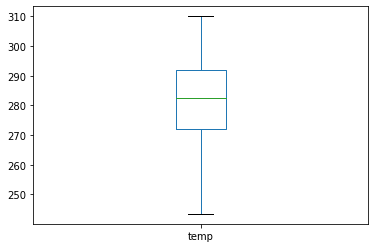

In [9]:
df_data['temp'].plot.box()

## Coluna Chuva

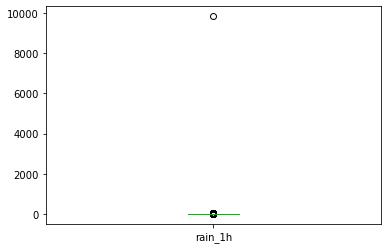

In [10]:
df_data['rain_1h'].plot.box()

Conforme Visto, enquanto a maioria dos dados se concentra próximo a 0, há alguns próximo a 10000, o que não faz sentido.

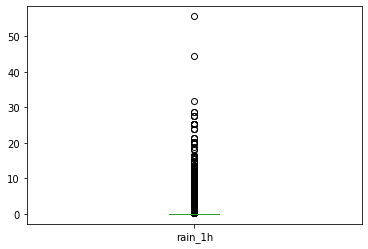

In [11]:
df_data[df_data['rain_1h'] < 2000]['rain_1h'].plot.box()

Conforme Visto, mesmo retirnado os outliers, ainda continuam alguns, através de algumas pesquisas, foi descoberto que a base de dados é do estado de Minnesota, em 2007, Minnesota conseguiu um recorde de chuva de 15.10 no condado de Hokah, o que daria por votla de 0.63 por hora, portanto, será retirando todas as amostras menor que esse valor.

In [12]:
df_data = df_data[df_data['rain_1h'] < 0.63]

## Coluna Neve

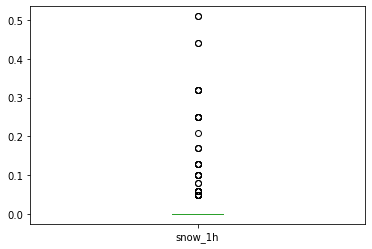

In [13]:
df_data['snow_1h'].plot.box()

Apesar do gráfico indicar vários outliers, através de pesquisas, Minnesota já obtever recorde de 914mm de neve em 24h, o que daria 38mm por hora, mostrando que os dados acima são possíveis.

## Nuvems

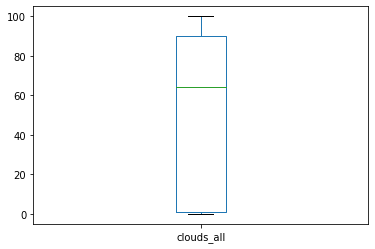

In [14]:
df_data['clouds_all'].plot.box()

Conforme mostra o gráfico, nenhum possível outliear foi indicado.

## Volume de trafégo

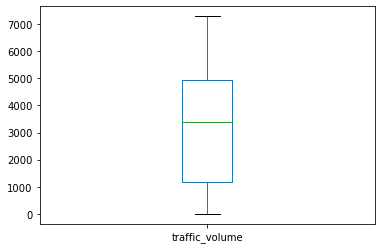

In [15]:
df_data['traffic_volume'].plot.box()

Nenhum possível outliear foi indicado.

Pode ser visto que as colunas númericas apresentam valores de mínimos e máximos diferentes, o que indifica uma necessidade de normalização.

## Converter Categorias Para Números

In [16]:
LE = LabelEncoder()
df_data['weather_main'] = LE.fit_transform(df_data['weather_main'])
df_data['weather_description'] = LE.fit_transform(df_data['weather_description'])
df_data['holiday'] = LE.fit_transform(df_data['holiday'])
df_data.head(2)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,7,288.28,0.0,0.0,40,1,23,2012-10-02 09:00:00,5545
1,7,289.36,0.0,0.0,75,1,1,2012-10-02 10:00:00,4516


## Formatando A Data

In [17]:
if data_is_formated:
    traffic_volume = df_data.pop('traffic_volume')
    df_data['date_time'] = pd.to_datetime(df_data['date_time'], errors='raise')
    df_data['day_of_week'] = pd.to_datetime(df_data['date_time'], errors='raise').dt.dayofweek
    df_data['date_time'] = pd.to_datetime(df_data['date_time'], errors='raise').dt.hour
    df_data['traffic_volume'] = traffic_volume
    data_is_formated = False
df_data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,day_of_week,traffic_volume
0,7,288.28,0.0,0.0,40,1,23,9,1,5545
1,7,289.36,0.0,0.0,75,1,1,10,1,4516
2,7,289.58,0.0,0.0,90,1,18,11,1,4767
3,7,290.13,0.0,0.0,90,1,18,12,1,5026
4,7,291.14,0.0,0.0,75,1,1,13,1,4918
...,...,...,...,...,...,...,...,...,...,...
48199,7,283.45,0.0,0.0,75,1,1,19,6,3543
48200,7,282.76,0.0,0.0,90,1,18,20,6,2781
48201,7,282.73,0.0,0.0,90,10,20,21,6,2159
48202,7,282.09,0.0,0.0,90,1,18,22,6,1450


## Verificando Necessidade de Normalização

In [18]:
pd.DataFrame([df_data.min(), df_data.max()], index= ['Min', 'Max'])

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,day_of_week,traffic_volume
Min,0.0,243.39,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
Max,11.0,310.07,0.62,0.51,100.0,10.0,34.0,23.0,6.0,7280.0


## Normalizando Dados

O primeiro passo para a normalização é obter todas as colunas númericas

In [19]:
numeric_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
dfOnlyNumericsData = df_data.select_dtypes(numeric_types)
dfOnlyNumericsData.head(1)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,day_of_week,traffic_volume
0,7,288.28,0.0,0.0,40,1,23,9,1,5545


Agora podemos normalizar os dados colocando todos entre 0 e 1

In [20]:
df_normalized = df_data.copy()
for column in dfOnlyNumericsData:
    if column == 'traffic_volume':
        break
    normalized_column = (dfOnlyNumericsData[column] - dfOnlyNumericsData[column].min())/(dfOnlyNumericsData[column].max() - dfOnlyNumericsData[column].min())
    df_normalized[column] = normalized_column

In [21]:
pd.DataFrame([df_normalized.min(), df_normalized.max()], index= ['Min', 'Max'])

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,day_of_week,traffic_volume
Min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7280.0


Conforme visto, os dados númericos foram normalizados

## Matriz de Correlação

In [22]:
corr_matrix = df_normalized.corr().abs()
corr_matrix.style.background_gradient('coolwarm').set_precision(2)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,day_of_week,traffic_volume
holiday,1,0.00037,0.006,0.00042,0.0082,0.0029,0.0081,0.025,0.02,0.018
temp,0.00037,1,0.081,0.022,0.13,0.073,0.034,0.12,0.0031,0.14
rain_1h,0.006,0.081,1,0.005,0.078,0.21,0.077,0.0039,0.024,0.013
snow_1h,0.00042,0.022,0.005,1,0.029,0.041,0.0028,0.012,0.015,0.0053
clouds_all,0.0082,0.13,0.078,0.029,1,0.5,0.5,0.057,0.039,0.068
weather_main,0.0029,0.073,0.21,0.041,0.5,1,0.25,0.053,0.04,0.039
weather_description,0.0081,0.034,0.077,0.0028,0.5,0.25,1,0.015,0.028,0.061
date_time,0.025,0.12,0.0039,0.012,0.057,0.053,0.015,1,0.002,0.35
day_of_week,0.02,0.0031,0.024,0.015,0.039,0.04,0.028,0.002,1,0.15
traffic_volume,0.018,0.14,0.013,0.0053,0.068,0.039,0.061,0.35,0.15,1


Conforme visto, não há uma correlação muito forte entre as variáveis de entrada.

## Separando Dados de Entrada e Saida, X e Y Respectivamente

In [23]:
X = df_normalized.iloc[:,:-1].values
Y = df_normalized.iloc[:,-1:].values

# Separando em dados de treino(entrada e saida) e dados de teste(entrada e saida)

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.30)

## Utilizando KNN Regressão - Split - Primeiro

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor(n_neighbors=17).fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

A métrica usada aqui é a r2_socre, quanto mais próximo de 1.0 melhor, 1.0 é o ideal

In [26]:
r2_score(Y_test, Y_pred)

0.8795454324984546

Gráfico em Barra Comparando o Valol Real e o Previsto

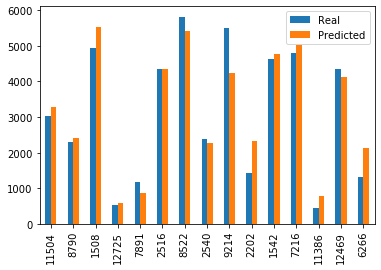

In [27]:
graphPredReal = pd.DataFrame({'Real': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
graphPredRealPlot = graphPredReal.sample(15)
graphPredRealPlot.plot.bar()

# Separando em dados de treino(entrada e saida) e dados de teste(entrada e saida)

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.30)

## Utilizando KNN Regressão - Split - Segundo

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor(n_neighbors=17).fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

A métrica usada aqui é a r2_socre, quanto mais próximo de 1.0 melhor, 1.0 é o ideal

In [30]:
r2_score(Y_test, Y_pred)

0.878131415045843

Gráfico em Barra Comparando o Valol Real e o Previsto

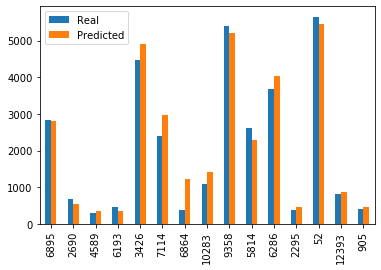

In [31]:
graphPredReal = pd.DataFrame({'Real': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
graphPredRealPlot = graphPredReal.sample(15)
graphPredRealPlot.plot.bar()

## Utilizando KNN Regressão - Cross Validation 10

In [32]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn, X_train, Y_train, cv=10)
Y_pred = knn.predict(X_test)
print('cv scores de : {}\nmédia de : {}'.format(cv_scores, cv_scores.mean()))

cv scores de : [0.87337755 0.87776607 0.87577081 0.87805375 0.87978826 0.87226518
 0.87394161 0.87383902 0.87117359 0.87454203]
média de : 0.8750517874089494
